In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import matplotlib as mpl

In [2]:
mpl.rcParams['hatch.linewidth'] = 0.5

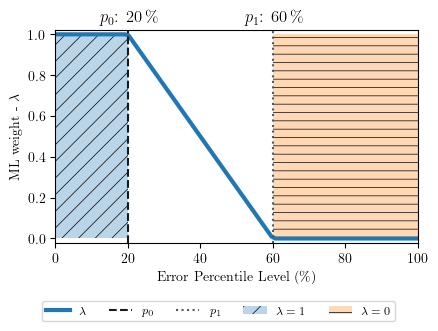

In [4]:
from setup_mpl_tex import setup_mpl_tex

setup_mpl_tex()

p0 = 20
p1 = 60

x = np.linspace(0,100,100)
y = 1 - (x-p0)/(p1-p0)
y = np.maximum(np.minimum(y, 1), 0)

fig, ax = plt.subplots(figsize=(6.4*2/3,4.8*2/3), constrained_layout=True)

ax.plot(x,y, lw=3, label='$\\lambda$')
ax.axvline(p0, ls='--', color='#19191a', label='$p_0$')
ax.axvline(p1, ls=':', color='#575759', label='$p_1$')
ax.fill_betweenx([0,1], 0, p0, alpha=0.3, hatch='//', label='$\\lambda = 1$')
# plt.fill_betweenx([0,1], p0, p1, alpha=0.3, label='', label='$$')
ax.fill_betweenx([0,1], p1, 100, alpha=0.3, hatch='--', label='$\\lambda = 0$')

# ax.set_title(f'$p_0$: {p0}\u2009%, $p_1$: {p1}\u2009%')
ax.text(0.12,1.04,f'$p_0$: {p0}\,\%', fontsize='large', transform=ax.transAxes)
ax.text(0.52,1.04,f'$p_1$: {p1}\,\%', fontsize='large', transform=ax.transAxes)
ax.set_xlabel('Error Percentile Level (\%)')
ax.set_ylabel('ML weight - $\\lambda$')
ax.set_xlim(0,100)
ax.set_ylim(-0.02,1.02)
# ax.grid()
# plt.legend(loc='upper left', bbox_to_anchor=(1,1))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5,0.06), ncol=5, frameon=True, fontsize='small', bbox_transform=fig.transFigure)
plt.legend(loc='upper center', bbox_to_anchor=(0.45,-0.25), ncol=5, frameon=True, fontsize='small')
# plt.savefig(f'Figures/p0{p0}_p1{p1}_vis.pdf', bbox_inches='tight')#, dpi=300)
plt.show()

(0.0, 100.0)

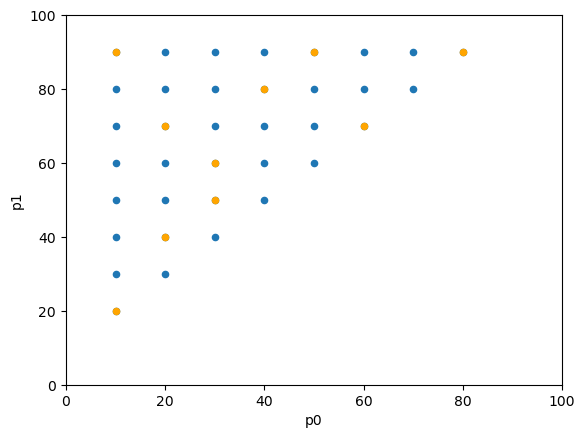

In [14]:
fig, ax = plt.subplots()

df_all.plot.scatter('p0', 'p1', ax=ax)
df_comp.plot.scatter('p0', 'p1', ax=ax, color='orange')

plt.xlim(0, 100)
plt.ylim(0, 100)

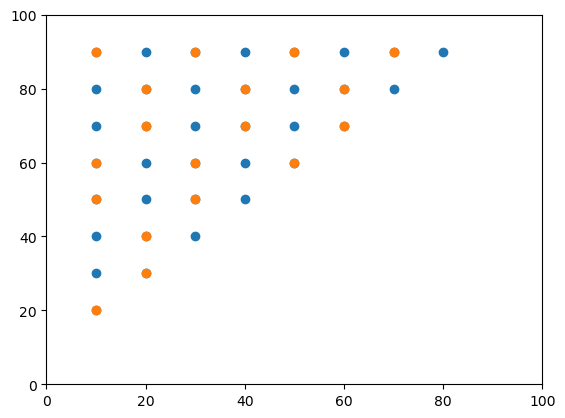

In [15]:
fig, ax = plt.subplots()

p0all = []
p1all = []

for i in range(20,100,10):
    for j in range(10,i,10):
        p1all.append(i)
        p0all.append(j)
p0all = np.array(p0all)
p1all = np.array(p1all)
N = len(p0all)

idx = np.concatenate([np.arange(0,N,4), np.arange(2,N,4)])
# idx = np.concatenate([np.arange(0,N,2)])
p0sel = p0all[idx]
p1sel = p1all[idx]

plt.scatter(p0all, p1all)
plt.scatter(p0sel, p1sel)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

base_path = '/work/bd1179/b309215/MyIconEval/Metrics/'
metric_files = [f for f in sorted(os.listdir(base_path)) if 'trueerror' not in f]# and 'pinn' not in f]
# metric_files = [f for f in metric_files if '10p0_20p1' in f or '10p0_90p1' in f or '80p0_90p1' in f or 'baseline' in f]
len(metric_files)

183

In [17]:
def p0p1_to_mlweight_naiv(p0, p1):
    return p0/100 + (p1-p0)/2/100

In [18]:
pinn_p0p1 = {}

for f in metric_files:
    pinnweight = None
    # all_metrics[f.replace('.csv', '')] = pd.read_csv(os.path.join(base_path, f))
    if 'fullml' in f or 'baseline' in f:
        continue

    p0p1 = re.search(r'(\d*p0_\d*p1)', f)
    pinn = re.search(r'_pinn385weight(\d*\.\d*).csv', f)
    if p0p1:
        p0p1 = p0p1.group(1)
        p0 = float(re.search(r'(\d*)p0.*', p0p1).group(1))
        p1 = float(re.search(r'.*?(\d*)p1.*', p0p1).group(1))
    else:
        p0 = None
        p1 = None
    if pinn:
        pinnweight = pinn.group(1)
    else:
        pinnweight = '0'

    if pinnweight in pinn_p0p1.keys():
        pinn_p0p1[pinnweight].append([p0, p1])
    else:
        pinn_p0p1[pinnweight] = [[p0,p1]]

    # if pinnweight == '0':
    #     print(f)

In [19]:
for k in pinn_p0p1.keys():
    print(k, len(pinn_p0p1[k]))
    # print(k, len(np.unique([f'{p0}-{p1}' for p0,p1 in pinn_p0p1[k]])))
    # print(k, np.unique([f'{p0}-{p1}' for p0,p1 in pinn_p0p1[k]], return_counts=True))
    # print(k, np.unique([f'{p0}-{p1}' for p0,p1 in pinn_p0p1[k]], return_counts=True, return_index=True))

0 36
0.01 36
0.1 36
0.5 36
0.9 36


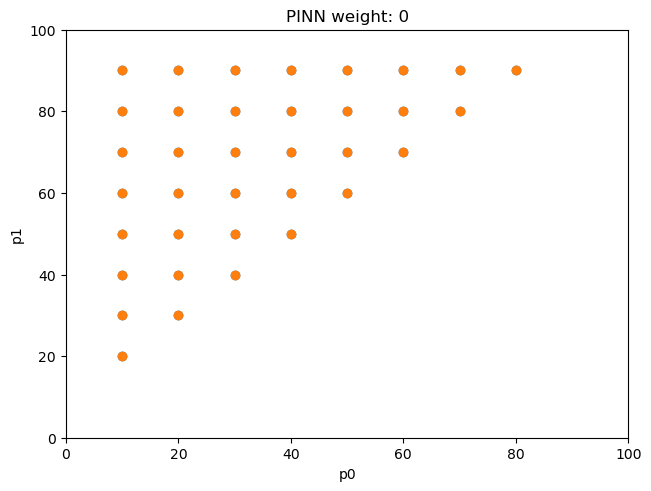

In [28]:
for k, v in pinn_p0p1.items():
    v_np = np.array(v)
    
    plt.figure(constrained_layout=True)#, figsize=(6.4*2/3,4.8*2/3))
    plt.scatter(p0all, p1all)
    plt.scatter(v_np[:,0], v_np[:,1])
    plt.title(f'PINN weight: {k}')
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.xlabel('p0')
    plt.ylabel('p1')
    # plt.savefig('Figures/P0_P1_sampling.png', dpi=300)
    break

plt.show()